In [1]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd

In [18]:
X = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\NHS3.3.csv', header = None )

In [19]:
y = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\y.csv', header = None )

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
                
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=self.test_size, random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations (self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                                        X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_ [-1]

        return self
        
    def transform (self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train.values[:, indices], y_train)
        y_pred = self.estimator.predict(X_test.values[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [22]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [23]:
svm = SVC(kernel='rbf', C=1.0, gamma=0.1, probability=True)
sbs = SBS (svm, k_features=1)

In [24]:
sbs.fit(X_train, y_train)

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
k_feat = [len(k) for k in sbs.subsets_]

In [26]:
plt.plot(k_feat, sbs.scores_, marker='o')

In [27]:
plt.ylim([0.6, 1.1])

(0.6, 1.1)

In [28]:
plt.ylabel('Accuracy')

In [29]:
plt.xlabel('Number of features')

In [30]:
plt.title("SBS Accuracy with SVM C=1.0, gamma=0.1")

In [31]:
plt.grid()

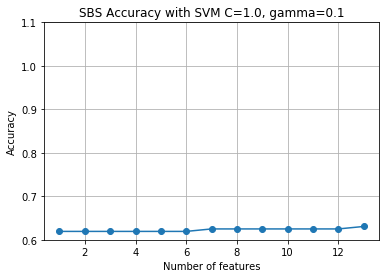

In [32]:
plt.show()

In [33]:
print(sbs.scores_)

[0.63068181818181823, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.61931818181818177, 0.61931818181818177, 0.61931818181818177, 0.61931818181818177, 0.61931818181818177, 0.61931818181818177]


C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


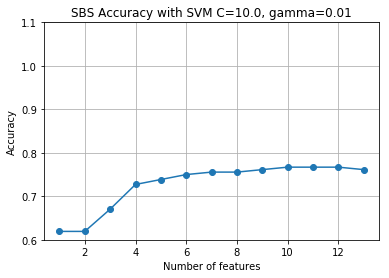

In [34]:
svm = SVC(kernel='rbf', C=10.0, gamma=0.1, probability=True)
sbs = SBS (svm, k_features=1)
sbs.fit(X_train, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.6, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title("SBS Accuracy with SVM C=10.0, gamma=0.01")
plt.grid()
plt.show()

In [35]:
print(sbs.scores_)

[0.76136363636363635, 0.76704545454545459, 0.76704545454545459, 0.76704545454545459, 0.76136363636363635, 0.75568181818181823, 0.75568181818181823, 0.75, 0.73863636363636365, 0.72727272727272729, 0.67045454545454541, 0.61931818181818177, 0.61931818181818177]


In [29]:
print(sbs.scores_)

[0.76136363636363635, 0.77272727272727271, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.76704545454545459, 0.76704545454545459, 0.76704545454545459, 0.76136363636363635, 0.74431818181818177, 0.73863636363636365, 0.71022727272727271, 0.69318181818181823, 0.61931818181818177, 0.61931818181818177]


C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


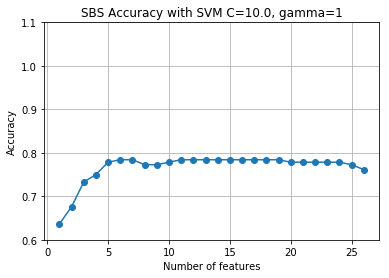

In [8]:
svm = SVC(kernel='rbf', C=10.0, gamma=1, probability=True)
sbs = SBS (svm, k_features=1)
sbs.fit(X_train, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.6, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title("SBS Accuracy with SVM C=10.0, gamma=1")
plt.grid()
plt.show()

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


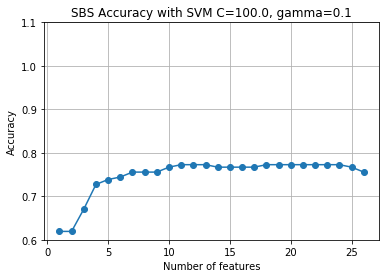

In [9]:
svm = SVC(kernel='rbf', C=10.0, gamma=0.1, probability=True)
sbs = SBS (svm, k_features=1)
sbs.fit(X_train, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.6, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title("SBS Accuracy with SVM C=100.0, gamma=0.1")
plt.grid()
plt.show()

In [10]:
print(sbs.scores_)

[0.75568181818181823, 0.76704545454545459, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.76704545454545459, 0.76704545454545459, 0.76704545454545459, 0.76704545454545459, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.76704545454545459, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.74431818181818177, 0.73863636363636365, 0.72727272727272729, 0.67045454545454541, 0.61931818181818177, 0.61931818181818177]


In [32]:
print(sbs.scores_)

[0.76704545454545459, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77840909090909094, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.76704545454545459, 0.76704545454545459, 0.76704545454545459, 0.76704545454545459, 0.77272727272727271, 0.77272727272727271, 0.77272727272727271, 0.77840909090909094, 0.77840909090909094, 0.77272727272727271, 0.73863636363636365, 0.73863636363636365, 0.67045454545454541, 0.61931818181818177]


C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


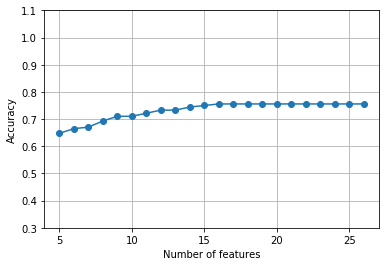

In [33]:
svm = SVC(kernel='rbf', C=5, gamma=0.05, probability=True)
sbs = SBS (svm, k_features=5)
sbs.fit(X_train, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.3, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [34]:
print(sbs.scores_)

[0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75568181818181823, 0.75, 0.74431818181818177, 0.73295454545454541, 0.73295454545454541, 0.72159090909090906, 0.71022727272727271, 0.71022727272727271, 0.69318181818181823, 0.67045454545454541, 0.66477272727272729, 0.64772727272727271]


In [35]:
avg_sbs_scores_ = [0.782608696, 0.826086957, 0.843478261, 0.869565217, 0.895652174, 0.895652174, 0.913043478, 0.913043478, 0.895652174, 0.913043478, 0.904347826, 0.895652174, 0.860869565, 0.852173913, 0.72173913]

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


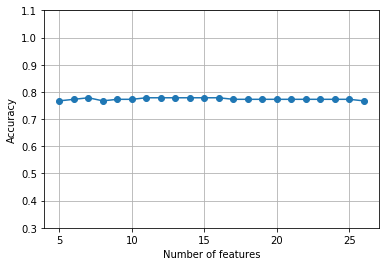

In [42]:
svm = SVC(kernel='rbf', C=50, gamma=0.1, probability=True)
sbs = SBS (svm, k_features=5)
sbs.fit(X_train, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.3, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


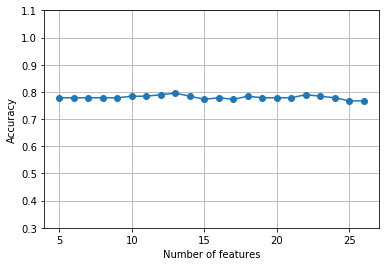

In [43]:
svm = SVC(kernel='rbf', C=50, gamma=1, probability=True)
sbs = SBS (svm, k_features=5)
sbs.fit(X_train, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.3, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()